## 1. Import dataset in pandas 

In [1]:
# Importing Dataset
import pandas as pd
df=pd.read_csv("ecommerce_sample (1).csv")
df.head(3)


,userId,productId,rating,timestamp,product_name,manufacturer,price,number_available_in_stock,number_of_reviews,number_of_answered_questions,average_review_rating,category_and_sub_category,customers_who_bought_this_item_also_bought,description,product_information,product_description,items_customers_buy_after_viewing_this_item,customer_questions_and_answers,customer_reviews,sellers
0,A39HTATAQ9V7YF,205616461,5,1369699200,Hornby 2014 Catalogue,Hornby,£3.42,5 new,15.0,1.0,4.9 out of 5 stars,Hobbies > Model Trains & Railway Sets > Rail V...,http://www.amazon.co.uk/Hornby-R8150-Catalogue...,Product Description Hornby 2014 Catalogue Box ...,Technical Details Item Weight640 g Product Dim...,Product Description Hornby 2014 Catalogue Box ...,http://www.amazon.co.uk/Hornby-R8150-Catalogue...,Does this catalogue detail all the previous Ho...,Worth Buying For The Pictures Alone (As Ever) ...,"{""seller""=>[{""Seller_name_1""=>""Amazon.co.uk"", ..."
1,A3JM6GV9MNOF9X,558925278,3,1355443200,FunkyBuys® Large Christmas Holiday Express Fes...,Hornby,£16.99,5 new,2.0,1.0,4.5 out of 5 stars,Hobbies > Model Trains & Railway Sets > Rail V...,http://www.amazon.co.uk/Christmas-Holiday-Expr...,Size Name:Large FunkyBuys® Large Christmas Hol...,Technical Details Manufacturer recommended age...,Size Name:Large FunkyBuys® Large Christmas Hol...,http://www.amazon.co.uk/Christmas-Holiday-Expr...,can you turn off sounds // hi no you cant turn...,Four Stars // 4.0 // 18 Dec. 2015 // By\n \...,"{""seller""=>{""Seller_name_1""=>""UHD WHOLESALE"", ..."
2,A1Z513UWSAAO0F,558925278,5,1404691200,CLASSIC TOY TRAIN SET TRACK CARRIAGES LIGHT EN...,Hornby,£9.99,2 new,17.0,2.0,3.9 out of 5 stars,Hobbies > Model Trains & Railway Sets > Rail V...,http://www.amazon.co.uk/Classic-Train-Lights-B...,BIG CLASSIC TOY TRAIN SET TRACK CARRIAGE LIGHT...,Technical Details Manufacturer recommended age...,BIG CLASSIC TOY TRAIN SET TRACK CARRIAGE LIGHT...,http://www.amazon.co.uk/Train-With-Tracks-Batt...,What is the gauge of the track // Hi Paul.Trut...,**Highly Recommended!** // 5.0 // 26 May 2015 ...,"{""seller""=>[{""Seller_name_1""=>""DEAL-BOX"", ""Sel..."


## 2. Extracting numbers from strings 
The <b>number_available_in_stock </b> column in the dataset is a text field that has the number of new
stock within the string hence we are extracting just the number.

In [2]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1999 entries, 0 to 1998
Data columns (total 20 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   userId                                       1999 non-null   object 
 1   productId                                    1999 non-null   object 
 2   rating                                       1999 non-null   int64  
 3   timestamp                                    1999 non-null   int64  
 4   product_name                                 1999 non-null   object 
 5   manufacturer                                 1999 non-null   object 
 6   price                                        1740 non-null   object 
 7   number_available_in_stock                    1888 non-null   object 
 8   number_of_reviews                            1993 non-null   float64
 9   number_of_answered_questions                 1867 non-null   float64
 10  

In [3]:
import re
def return_number(time_string):
    # Use \d+ to grab digits
    pattern = re.compile(r'\d')

    # Use match on th epattern and column
    num = re.search(pattern, str(time_string))
    if num is not None:
        return int(num.group(0))
df["stock_available"]=None
df['stock_available'] = df['number_available_in_stock'].apply(return_number)

#removing the currency symbol '£' from 'price' so that we can convert 'price' column to int for further processing 
df['price']=df['price'].str.replace('£', '')

print(df[['stock_available','price']].head(10))


   stock_available   price
0              5.0    3.42
1              5.0   16.99
2              2.0    9.99
3              NaN   39.99
4              NaN   32.19
5              NaN    6.99
6              NaN   24.99
7              3.0   69.93
8              4.0  235.58
9              1.0     NaN


In [4]:
#2 method to extract 
df['stock_available'] = df['number_available_in_stock'].str.extract(r'^(\d)', expand=False)
print(df['stock_available'].head())

0      5
1      5
2      2
3    NaN
4    NaN
Name: stock_available, dtype: object


## 3. Checking column types & Converting Column types 

In [29]:
print(len(df.columns))
print(df.dtypes)
df["price"] = df["price"].astype(str).astype(float)
print(df.dtypes)
print(df.shape)

21
userId                                          object
productId                                       object
rating                                           int64
timestamp                                        int64
product_name                                    object
manufacturer                                    object
price                                           object
number_available_in_stock                       object
number_of_reviews                              float64
number_of_answered_questions                   float64
average_review_rating                           object
category_and_sub_category                       object
customers_who_bought_this_item_also_bought      object
description                                     object
product_information                             object
product_description                             object
items_customers_buy_after_viewing_this_item     object
customer_questions_and_answers                  object
custome

## 4. Dropping missing data and removing irrelavent columns 
Let's remove some of the rows where certain columns have missing values. 

In [30]:
import warnings
warnings.filterwarnings("ignore")
print(df.shape)
print(df.isnull().sum())

#removing all the missing values
df = df[df['number_available_in_stock'].notnull()&
                     df['number_of_answered_questions'].notnull() & 
                     df['category_and_sub_category'].notnull() &
                     df['number_of_reviews'].notnull()]

#replacing the missing values in 'price' column with mean
df['price'].fillna(value=df['price'].mean(), inplace=True)

#dropping irrelavent columns
to_drop=['average_review_rating','customers_who_bought_this_item_also_bought','description','product_information','items_customers_buy_after_viewing_this_item', 'customer_questions_and_answers', 'customer_reviews', 'sellers']
df=df.drop(to_drop,axis=1)

# Print out the shape of the new dataset
print(df.shape)
# Check how many values are missing in the new dataset
print(df.isnull().sum())

(1999, 21)
userId                                            0
productId                                         0
rating                                            0
timestamp                                         0
product_name                                      0
manufacturer                                      0
price                                           259
number_available_in_stock                       111
number_of_reviews                                 6
number_of_answered_questions                    132
average_review_rating                             6
category_and_sub_category                        33
customers_who_bought_this_item_also_bought      226
description                                     106
product_information                              19
product_description                             106
items_customers_buy_after_viewing_this_item     765
customer_questions_and_answers                 1801
customer_reviews                                  6
s

## 5. Encoding categorical variables

In [31]:
print(df['manufacturer'].unique())
print(len(df['manufacturer'].unique()))

# Create a one-hot encoded set of the type values
type_set = pd.get_dummies(df['manufacturer'])

# Concatenate this set back to the ufo DataFrame
#df = pd.concat([df, type_set], axis=1)

print(type_set.head())
#print(df.columns)
#print(len(df.columns))

['Hornby' 'Q-Workshop ' 'Intex ' 'Hasbro ' 'Oxford Diecast']
5
   Hasbro   Hornby  Intex   Oxford Diecast  Q-Workshop 
0        0       1       0               0            0
1        0       1       0               0            0
2        0       1       0               0            0
7        0       1       0               0            0
8        0       1       0               0            0


## 6. Recommendation system 1 
When a business is setting up its e-commerce website for the first time without any users history and their rating

In [5]:
#New e-commerce website has the details of the product without any purchase history and other details hence we are 
#designing a recommendation system using product description
df_new = pd.read_csv("ecommerce_sample.csv")
df_new=df_new[['productId','product_name','category_and_sub_category','manufacturer','product_description']]
df_new["product_description"]=df_new["product_description"].fillna('')
df_new["category_and_sub_category"]=df_new["category_and_sub_category"].fillna('')
df_new['category_and_sub_category']=df_new['category_and_sub_category'].str.replace('>','|')
df_new.head()

,productId,product_name,category_and_sub_category,manufacturer,product_description
0,205616461,Hornby 2014 Catalogue,Hobbies | Model Trains & Railway Sets | Rail V...,Hornby,Product Description Hornby 2014 Catalogue Box ...
1,558925278,FunkyBuys® Large Christmas Holiday Express Fes...,Hobbies | Model Trains & Railway Sets | Rail V...,Hornby,Size Name:Large FunkyBuys® Large Christmas Hol...
2,558925278,CLASSIC TOY TRAIN SET TRACK CARRIAGES LIGHT EN...,Hobbies | Model Trains & Railway Sets | Rail V...,Hornby,BIG CLASSIC TOY TRAIN SET TRACK CARRIAGE LIGHT...
3,733001998,HORNBY Coach R4410A BR Hawksworth Corridor 3rd,Hobbies | Model Trains & Railway Sets | Rail V...,Hornby,Hornby 00 Gauge BR Hawksworth 3rd Class W 2107...
4,737104473,Hornby 00 Gauge 0-4-0 Gildenlow Salt Co. Steam...,Hobbies | Model Trains & Railway Sets | Rail V...,Hornby,Product Description Hornby RailRoad 0-4-0 Gild...


In [6]:
#importing the required libraries 
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score
import matplotlib.pyplot as plt
import numpy as np

comb_frame = df_new.product_name.str.cat(" "+df_new.category_and_sub_category.str.cat(" "+df_new.product_description))
#Let's transform the product related columns in the into tf/idf vectors 
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(stop_words='english')
X = vectorizer.fit_transform(comb_frame)
X

<1999x11863 sparse matrix of type '<class 'numpy.float64'>'
	with 75533 stored elements in Compressed Sparse Row format>

In [7]:
#with the help of KMeans we are clustering the all the similar group of words
#with the helo of elbow method we are finding total number of clusters
from sklearn.cluster import KMeans
wcss = []
for i in range(1,30):
    kmeans = KMeans(n_clusters = i,init='k-means++', max_iter=100)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
    #inertia_ : Sum of squared distances of samples to their closest cluster center.

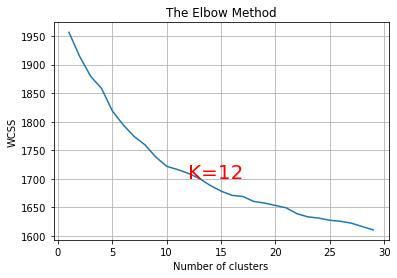

In [8]:
plt.figure()
plt.plot(range(1, 30), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.text(12,wcss[12],'K=12',color='red',fontsize=20)
plt.grid(True)
plt.show()

[[0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [2.67112044e-01 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 ...
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [5.40989516e-04 2.95169610e-03 0.00000000e+00 ... 4.38043165e-04
  0.00000000e+00 0.00000000e+00]
 [2.23316941e-04 4.75858239e-03 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]]


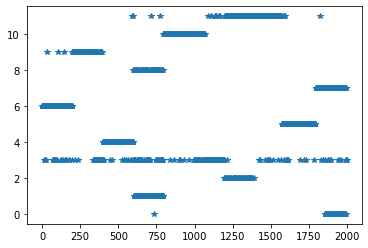

In [9]:
# Fitting K-Means to the dataset
kmeans = KMeans(n_clusters = 12)
y_kmeans = kmeans.fit_predict(X)
print(kmeans.cluster_centers_)
plt.plot(y_kmeans, "*")
plt.show()

In [10]:
# # Optimal clusters is 

true_k = 12

model = KMeans(n_clusters=true_k, init='k-means++', max_iter=100, n_init=1)
model.fit(X)

print("Top terms per cluster:")
order_centroids = model.cluster_centers_.argsort()[:, ::-1]
terms = vectorizer.get_feature_names()
for i in range(true_k):
    print("Cluster %d:" % i),
    for ind in order_centroids[i, :10]:
        print(' %s' % terms[ind]),
    print

Top terms per cluster:
Cluster 0:
 dice
 d20
 d12
 d8
 d4
 d10
 opaque
 d6
 games
 set
Cluster 1:
 glitter
 stencil
 stencils
 use
 brush
 body
 tattoo
 glue
 kit
 cosmetic
Cluster 2:
 dice
 games
 game
 set
 black
 sided
 workshop
 cubes
 d6
 white
Cluster 3:
 vehicles
 toy
 cars
 cast
 die
 models
 ford
 scaled
 accessories
 pixar
Cluster 4:
 vehicles
 toy
 models
 cast
 die
 scaled
 model
 scale
 accessories
 car
Cluster 5:
 trains
 model
 railway
 rail
 hobbies
 scale
 sets
 vehicles
 following
 hornby
Cluster 6:
 combined
 items
 50
 00
 postage
 10
 k2
 shipment
 discount
 welcome
Cluster 7:
 sand
 calendar
 advent
 art
 crafts
 christmas
 arts
 kinetic
 playmobil
 fun
Cluster 8:
 dress
 fancy
 tattoos
 kits
 temporary
 tattoo
 sets
 costume
 accessories
 party
Cluster 9:
 thomas
 plush
 friends
 characters
 brands
 wooden
 train
 play
 bear
 soft
Cluster 10:
 toys
 pool
 beach
 outdoor
 inflating
 airbeds
 devices
 sports
 water
 inflatable
Cluster 11:
 figures
 fantasy
 fiction

In [13]:
df_new['InputString'] = df_new.product_name.str.cat(" "+df_new.category_and_sub_category.str.cat(" "+df_new.product_description))

In [14]:
def cluster_predict(str_input):
    Y = vectorizer.transform(list(str_input))
    prediction = model.predict(Y)
    return prediction
df_new['ClusterPrediction'] = ""
df_new['ClusterPrediction']=df_new.apply(lambda x: cluster_predict(df_new['InputString']), axis=0)
df_new['InputString'].head(2)

0    Hornby 2014 Catalogue Hobbies | Model Trains &...
1    FunkyBuys® Large Christmas Holiday Express Fes...
Name: InputString, dtype: object

In [15]:
new_productid = list(range(0,df_new.shape[0]))
df_new['new_productid']=new_productid
df_new.tail(5)

,productId,product_name,category_and_sub_category,manufacturer,product_description,InputString,ClusterPrediction,new_productid
1997,9790798326,LARGE Super Dynamic Radio Controlled RC Robot ...,Fancy Dress | Accessories | Sets & Kits,Oxford Diecast,The TT331 SUPER ROBOT is a fully functional ro...,LARGE Super Dynamic Radio Controlled RC Robot ...,0,1997
1998,9790798326,Hot Wheels 10-in-1 Super Set,Fancy Dress | Accessories | Sets & Kits,Oxford Diecast,Product Description Race on your own terms! Cr...,Hot Wheels 10-in-1 Super Set Fancy Dress | Acc...,0,1998


In [16]:
df_new['ClusterPrediction'].value_counts()

0     354
8     256
2     250
9     204
5     187
1     180
11    164
10    159
3      99
7      58
4      57
6      31
Name: ClusterPrediction, dtype: int64

In [17]:
def print_cluster(i):
    print("Cluster %d:" % i),
    for ind in order_centroids[i, :10]:
        print(' %s' % terms[ind]),
    print

In [18]:
def show_recommendations(product):
    #print("Cluster ID:")
    Y = vectorizer.transform([product])
    prediction = model.predict(Y)
    #print(prediction)
    print_cluster(prediction[0])

In [19]:
#Once a cluster is identified based on the user's search words, the recommendation system can display items 
#from the corresponding product clusters based on the product descriptions.
show_recommendations("dress")

Cluster 7:
 dress
 costume
 fancy
 kits
 sets
 accessories
 size
 chest
 ladies
 party


In [22]:
#This function select the cluster for a user according the the user choice
import random
def select_c():
    global l
    print('Select The product Id you would like to buy:')
    l=[]
    for i in range(15):
        l.append(random.randint(0,1999))
    for i in l:
        print(df_new['new_productid'][i] , df_new['product_name'][i],df_new['category_and_sub_category'][i],sep='--->')
    print('--------------------------------------------------------------------')
    l = int(input())
    l = df_new['ClusterPrediction'][df_new.new_productid == l]

In [23]:
# This is the main function which recommend you products
def main():
    ans = False
    while not ans:
        select_c()
        print(df_new[['productId','product_name','category_and_sub_category']][df_new.ClusterPrediction == int(l)].sample(n=10))
        print('--------------------------------------------------------------------')
        print('Do you like these products(y/n)')
        abc = input()
        while ((abc =='y') or (abc == 'Y')):          
            print(df_new['product_name'][df_new.ClusterPrediction == int(l)].sample(n=10))
            print('--------------------------------------------------------------------')
            print('Want more!!!!(y/n)')
            abc = input()
            if ((abc =='N') or (abc == 'n')):
                ans =True

In [24]:
main()

Select The product Id you would like to buy:
1010--->Collectors World Figure Astro Boy A-02 atom and (hear?) (japan import)--->Die-Cast & Toy Vehicles | Toy Vehicles & Accessories | Scaled Models | Vehicles
467--->Elvish Dice White/Black (7)--->Games | Dice & Dice Games
206--->The Puppet Company - Finger Puppets - Silverback Gorilla--->Characters & Brands | Thomas & Friends | Train Play | Wooden Thomas
62--->Train Tech DS6 One Touch DCC Signal Dual Home (R/G)--->Hobbies | Model Trains & Railway Sets | Rail Vehicles | Trains
721--->Wizard Kinetic Sand - PREMIUM QUALITY 4.4lb (2kg), 4 colours, ECO friendly All you need basket LIMITED EDITION--->Arts & Crafts | Art Sand
422--->Ultra Pro Dual Deck Box [Toy]--->Games | Dice & Dice Games
86--->Thomas and Friends Track Master Dockside Delivery Crane Cargo and Cars Set--->Hobbies | Model Trains & Railway Sets | Rail Vehicles | Trains
1290--->ETHAHE 300pcs Yellow Lemon Scented Flavour Latex-free Loom Refill Rubber Bands Pack Bracelets with 15 S

## 7. Recommendation system 2 
Product recommendation using K-Nearest Neighbors

In [32]:
#based on product category and manufacturer, we are finding the similarlity between the products and recommending them to the users
df['category_and_sub_category'] = df['category_and_sub_category'].str.split('>')
print(df['category_and_sub_category'].head())

0    [Hobbies ,  Model Trains & Railway Sets ,  Rai...
1    [Hobbies ,  Model Trains & Railway Sets ,  Rai...
2    [Hobbies ,  Model Trains & Railway Sets ,  Rai...
7    [Hobbies ,  Model Trains & Railway Sets ,  Rai...
8    [Hobbies ,  Model Trains & Railway Sets ,  Rai...
Name: category_and_sub_category, dtype: object


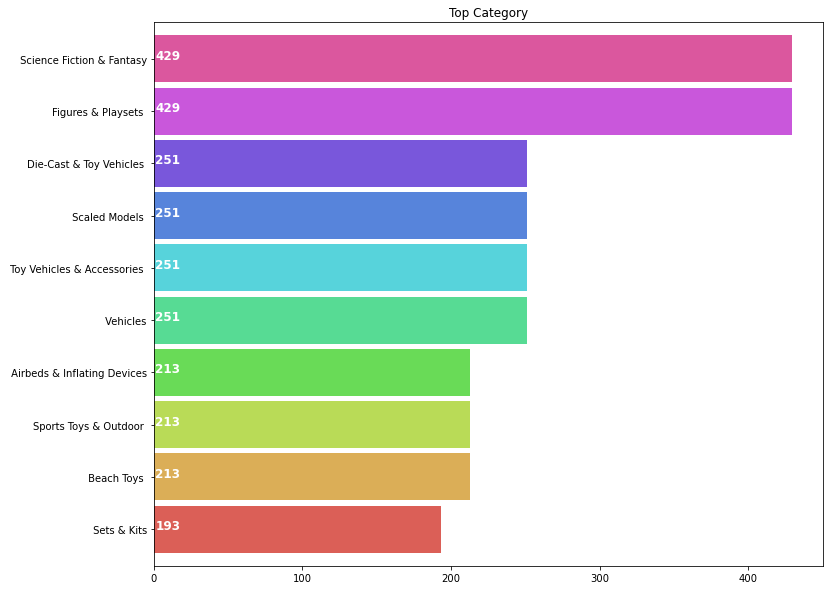

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.subplots(figsize=(12,10))
list1 = []
for i in df['category_and_sub_category']:
    list1.extend(i)
ax = pd.Series(list1).value_counts()[:10].sort_values(ascending=True).plot.barh(width=0.9,color=sns.color_palette('hls',10))
for i, v in enumerate(pd.Series(list1).value_counts()[:10].sort_values(ascending=True).values): 
    ax.text(1, i, v,fontsize=12,color='white',weight='bold')
plt.title('Top Category')
plt.show()

In [34]:
catList = []
for index, row in df.iterrows():
    category = row["category_and_sub_category"]
    
    for cat in category:
        if cat not in catList:
            catList.append(cat)
catList[:20]

['Hobbies ',
 ' Model Trains & Railway Sets ',
 ' Rail Vehicles ',
 ' Trains',
 'Characters & Brands ',
 ' Thomas & Friends ',
 ' Train Play ',
 ' Wooden Thomas',
 'Arts & Crafts ',
 " Children's Craft Kits",
 ' Disney ',
 ' Toys',
 'Handbags & Shoulder Bags ',
 " Kids'",
 'Games ',
 ' Dice & Dice Games',
 ' Art Sand',
 'Die-Cast & Toy Vehicles ',
 ' Toy Vehicles & Accessories ',
 ' Scaled Models ']

In [35]:
def binary(cat_list):
    binaryList = []
    
    for cat in catList:
        if cat in cat_list:
            binaryList.append(1)
        else:
            binaryList.append(0)
    
    return binaryList
df['category_bin'] = df['category_and_sub_category'].apply(lambda x: binary(x))
df['category_bin'].head(20)

0     [1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
1     [1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
2     [1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
7     [1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
8     [1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
9     [1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
10    [1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
11    [1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
12    [1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
13    [1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
14    [1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
15    [1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
16    [1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
17    [1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
18    [1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
19    [1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
20    [1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
21    [1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [36]:
def xstr(s):
    if s is None:
        return ''
    return str(s)
df['manufacturer'] = df['manufacturer'].apply(xstr)

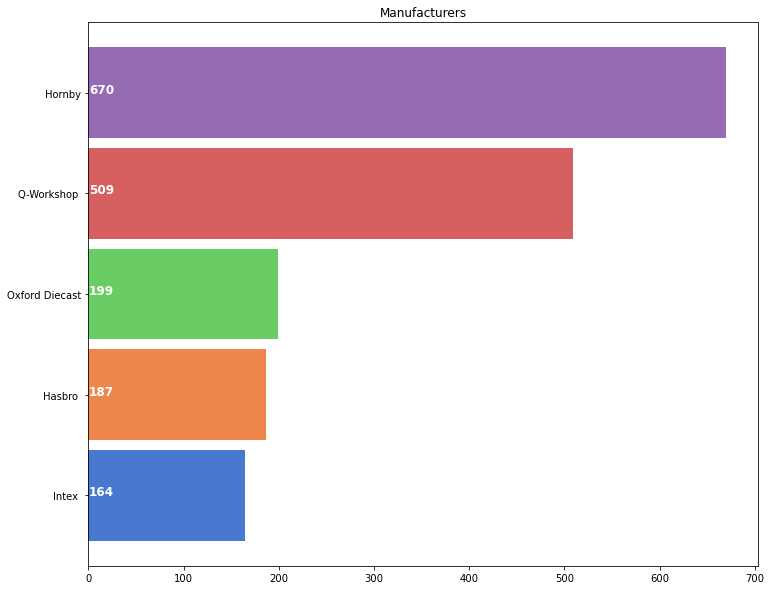

In [37]:
plt.subplots(figsize=(12,10))
ax = df[df['manufacturer']!=''].manufacturer.value_counts().sort_values(ascending=True).plot.barh(width=0.9,color=sns.color_palette('muted',40))
for i, v in enumerate(df[df['manufacturer']!=''].manufacturer.value_counts().sort_values(ascending=True).values): 
    ax.text(.5, i, v,fontsize=12,color='white',weight='bold')
plt.title('Manufacturers')
plt.show()

In [41]:
manuList=[]
for i in df['manufacturer']:
    if i not in manuList:
        manuList.append(i)

In [42]:
def binary(manu_list):
    binaryList = []  
    for direct in manuList:
        if direct in manu_list:
            binaryList.append(1)
        else:
            binaryList.append(0)
    return binaryList

In [43]:
df['manu_bin'] = df['manufacturer'].apply(lambda x: binary(x))
df.head()

,userId,productId,rating,timestamp,product_name,manufacturer,price,number_available_in_stock,number_of_reviews,number_of_answered_questions,category_and_sub_category,product_description,stock_available,category_bin,manu_bin
0,A39HTATAQ9V7YF,205616461,5,1369699200,Hornby 2014 Catalogue,Hornby,3.42,5 new,15.0,1.0,"[Hobbies , Model Trains & Railway Sets , Rai...",Product Description Hornby 2014 Catalogue Box ...,5.0,"[1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[1, 0, 0, 0, 0]"
1,A3JM6GV9MNOF9X,558925278,3,1355443200,FunkyBuys® Large Christmas Holiday Express Fes...,Hornby,16.99,5 new,2.0,1.0,"[Hobbies , Model Trains & Railway Sets , Rai...",Size Name:Large FunkyBuys® Large Christmas Hol...,5.0,"[1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[1, 0, 0, 0, 0]"
2,A1Z513UWSAAO0F,558925278,5,1404691200,CLASSIC TOY TRAIN SET TRACK CARRIAGES LIGHT EN...,Hornby,9.99,2 new,17.0,2.0,"[Hobbies , Model Trains & Railway Sets , Rai...",BIG CLASSIC TOY TRAIN SET TRACK CARRIAGE LIGHT...,2.0,"[1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[1, 0, 0, 0, 0]"
7,A22VW0P4VZHDE3,1304139220,5,1373068800,Hornby Santa's Express Train Set,Hornby,69.93,3 new,36.0,7.0,"[Hobbies , Model Trains & Railway Sets , Rai...",Product Description Inject a bit of Hornby mag...,3.0,"[1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[1, 0, 0, 0, 0]"
8,A3V3RE4132GKRO,130414089X,5,1401840000,Hornby Gauge Western Express Digital Train Set...,Hornby,235.58,4 new,1.0,1.0,"[Hobbies , Model Trains & Railway Sets , Rai...",Western Express Digital Train Set with eLink a...,4.0,"[1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[1, 0, 0, 0, 0]"


In [44]:
#We will we using Cosine Similarity for finding the similarity between products.
from scipy import spatial

def Similarity(productId1, productId2):
    a = df.iloc[productId1]
    b = df.iloc[productId2]
    
    categoryA = a['category_bin']
    categoryB = b['category_bin']
    
    productDistance = spatial.distance.cosine(categoryA, categoryB)
    
    scoreA = a['manu_bin']
    scoreB = b['manu_bin']
    scoreDistance = spatial.distance.cosine(scoreA, scoreB)
    
    return productDistance + scoreDistance
Similarity(4,1600)

2.0

We see that the distance is about 2, which is high. The more the distance, the less similar the products are. Let's see what these random products actually were.

In [45]:
print(df.iloc[4])
print(df.iloc[1600])

userId                                                             A3V3RE4132GKRO
productId                                                              130414089X
rating                                                                          5
timestamp                                                              1401840000
product_name                    Hornby Gauge Western Express Digital Train Set...
manufacturer                                                               Hornby
price                                                                      235.58
number_available_in_stock                                                   4 new
number_of_reviews                                                               1
number_of_answered_questions                                                    1
category_and_sub_category       [Hobbies ,  Model Trains & Railway Sets ,  Rai...
product_description             Western Express Digital Train Set with eLink a...
stock_available 

It is evident that Hornby Gauge Western Express Digital Train Set and The Amazing Spiderman Stickers 2 are very different products with differnt category and manufacturer. Thus the distance is huge.

In [102]:
new_id = list(range(0,df.shape[0]))
df['new_id']=new_id
df1=df[['userId','productId','product_name','rating','category_and_sub_category','manufacturer','product_description','new_id','genres_bin','manu_bin']]
df1.head()

,userId,productId,product_name,rating,category_and_sub_category,manufacturer,product_description,new_id,genres_bin,manu_bin
0,A39HTATAQ9V7YF,205616461,Hornby 2014 Catalogue,5,"[Hobbies , Model Trains & Railway Sets , Rai...",Hornby,Product Description Hornby 2014 Catalogue Box ...,0,"[1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[1, 0, 0, 0, 0]"
1,A3JM6GV9MNOF9X,558925278,FunkyBuys® Large Christmas Holiday Express Fes...,3,"[Hobbies , Model Trains & Railway Sets , Rai...",Hornby,Size Name:Large FunkyBuys® Large Christmas Hol...,1,"[1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[1, 0, 0, 0, 0]"
2,A1Z513UWSAAO0F,558925278,CLASSIC TOY TRAIN SET TRACK CARRIAGES LIGHT EN...,5,"[Hobbies , Model Trains & Railway Sets , Rai...",Hornby,BIG CLASSIC TOY TRAIN SET TRACK CARRIAGE LIGHT...,2,"[1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[1, 0, 0, 0, 0]"
7,A22VW0P4VZHDE3,1304139220,Hornby Santa's Express Train Set,5,"[Hobbies , Model Trains & Railway Sets , Rai...",Hornby,Product Description Inject a bit of Hornby mag...,3,"[1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[1, 0, 0, 0, 0]"
8,A3V3RE4132GKRO,130414089X,Hornby Gauge Western Express Digital Train Set...,5,"[Hobbies , Model Trains & Railway Sets , Rai...",Hornby,Western Express Digital Train Set with eLink a...,4,"[1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[1, 0, 0, 0, 0]"


In [103]:
import operator

def predict_score(name):
    
    new_product = df1[df1['product_name'].str.contains(name)].iloc[0].to_frame().T
    print('Selected product: ',new_product.product_name.values[0])
    def getNeighbors(baseproduct, K):
        distances = []
    
        for index, prod in df1.iterrows():
            if prod['new_id'] != baseproduct['new_id'].values[0]:
                dist = Similarity(baseproduct['new_id'].values[0], prod['new_id'])
                distances.append((prod['new_id'], dist))
    
        distances.sort(key=operator.itemgetter(1))
        neighbors = []
    
        for x in range(K):
            neighbors.append(distances[x])
        return neighbors

    K = 10
    avgRating = 0
    neighbors = getNeighbors(new_product, K)
    
    print('\nRecommended products: \n')
    for neighbor in neighbors:
        avgRating = avgRating+df1.iloc[neighbor[0]][3]  
        print( df1.iloc[neighbor[0]][2]+" | category_and_sub_category: "+str(df1.iloc[neighbor[0]][4]).strip('[]').replace(' ','')+" | manufacturer: "+str(df1.iloc[neighbor[0]][5])+"| rating: "+str(df1.iloc[neighbor[0]][3]))
    
    print('\n')
    avgRating = avgRating/K
    print('The predicted rating for %s is: %f' %(new_product['product_name'].values[0],avgRating))
    print('The actual rating for %s is %f' %(new_product['product_name'].values[0],new_product['rating']))

In [104]:
predict_score('Hornby 2014 Catalogue')

Selected product:  Hornby 2014 Catalogue

Recommended products: 

FunkyBuys® Large Christmas Holiday Express Festive Train Set (SI-TY1017) Toy Light / Sounds / Battery Operated & Smoke | category_and_sub_category: 'Hobbies','ModelTrains&RailwaySets','RailVehicles','Trains' | manufacturer: Hornby| rating: 3
CLASSIC TOY TRAIN SET TRACK CARRIAGES LIGHT ENGINE BOXED BOYS KIDS BATTERY | category_and_sub_category: 'Hobbies','ModelTrains&RailwaySets','RailVehicles','Trains' | manufacturer: Hornby| rating: 5
Hornby Santa's Express Train Set | category_and_sub_category: 'Hobbies','ModelTrains&RailwaySets','RailVehicles','Trains' | manufacturer: Hornby| rating: 5
Hornby Gauge Western Express Digital Train Set with eLink and TTS Loco Train Set | category_and_sub_category: 'Hobbies','ModelTrains&RailwaySets','RailVehicles','Trains' | manufacturer: Hornby| rating: 5
Learning Curve Chuggington Interactive Chatsworth | category_and_sub_category: 'Hobbies','ModelTrains&RailwaySets','RailVehicles','Tra

## 8. Recommendation system 3 
Product popularity based recommendation system targeted at new customers

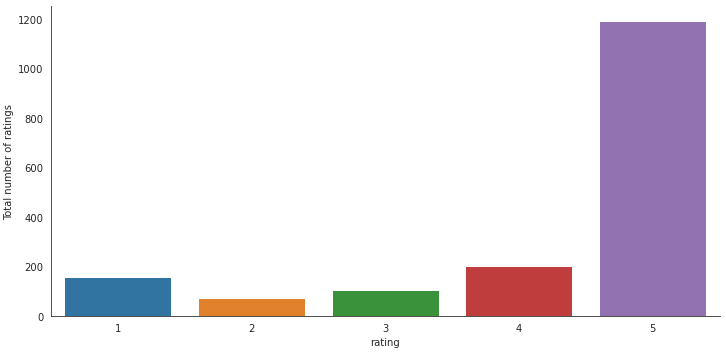

In [56]:
# Check the distribution of the rating
import seaborn as sns
with sns.axes_style('white'):
    g = sns.factorplot("rating", data=df, aspect=2.0,kind='count')
    g.set_ylabels("Total number of ratings")

looks like a very high proportion of ratings received is either 5 or 4. Next highest count of ratings received is for 1 which is still a very high number (=100000).

Lets compare the average rating for each product vs the number of people who rated for the product. This will help identify products which have a very high or low rating because of very few ratings received.

In [57]:
df_new=df[['productId','userId','product_name','rating']]
df_new

,productId,userId,product_name,rating
0,205616461,A39HTATAQ9V7YF,Hornby 2014 Catalogue,5
1,558925278,A3JM6GV9MNOF9X,FunkyBuys® Large Christmas Holiday Express Fes...,3
2,558925278,A1Z513UWSAAO0F,CLASSIC TOY TRAIN SET TRACK CARRIAGES LIGHT EN...,5
7,1304139220,A22VW0P4VZHDE3,Hornby Santa's Express Train Set,5
8,130414089X,A3V3RE4132GKRO,Hornby Gauge Western Express Digital Train Set...,5
...,...,...,...,...
1993,979079830X,A1FDVJSVBNN8VY,Pack Of 40+ Designs Fake Pretend Temporary Chi...,3
1994,979079830X,A2FRBJKIXR2TYO,Tattoo Book: 280 Special Design Temporary Tatt...,5
1996,9790798326,A2PH5VIDM6F7W5,Sphero Ollie for Android and iOS by Orbotix,1
1997,9790798326,ADFW3FGCFI7C7,LARGE Super Dynamic Radio Controlled RC Robot ...,5


In [58]:
#Popularity based filtering based on Product's ratings¶
products_df = pd.DataFrame(df_new.groupby('productId')['rating'].mean())
products_df['product_rating_counts'] = pd.DataFrame(df_new.groupby('productId')['rating'].count())
product_counts = products_df.sort_values('product_rating_counts', ascending=False)
df_popular = pd.merge(product_counts, df_new[['productId','product_name','userId']], on='productId', how = 'left' )
df_popular=df_popular.drop_duplicates(subset=['productId'])
df_popular.head(10)
#looks like the productid (97907909613) got the maximum number of rating hence it is the most popular product

,productId,rating,product_rating_counts,product_name,userId
0,9790790961,4.271429,70,Konfidence Youth Swim Jacket - Blue/Navy - 10-...,A2SR9M2CWC2OCP
70,9790778309,4.750000,40,50 pieces Tibetan Silver Alloy Twist Connector...,A28GT8K15D0LIS
110,9746427962,4.675676,37,10 RED CASINO STYLE DICE / CRAPS - LARGE 19MM NEW,AVIFRWR2YKO73
147,7806397051,3.285714,35,Steiff 25cm Classic Teddy Bear (Blond),A2LRQ8GV6PZMHX
182,9788071198,4.062500,32,LEGO Friends 41016: Advent Calendar,ATLDUADWJMTT0
214,9790786948,4.357143,28,"Embossing Folder 8""X8""-Regency Damask",AW6OQW5OQX3XS
242,9759091062,3.107143,28,Shadowrun Street Samurai Dice Set by Q-workshop,A3LMILRM9OC3SA
270,9788072216,4.619048,21,John Adams Sands Alive Animal Set,A16OJ5ISFFKC34
291,9790798075,4.047619,21,Insect Bugs Creepy Crawlies Temporary Kid's Ta...,A1AIMY9X24I21F
312,9790794231,4.571429,21,King Horse tattoo sticker waterproof men and w...,AA0O2EC4FJQRV


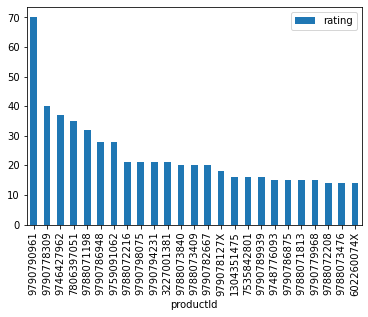

In [59]:
import matplotlib.pyplot as plt
popular_prod=pd.DataFrame(df.groupby('productId')['rating'].count())
most_popular=popular_prod.sort_values('rating', ascending=False)
most_popular.head(25).plot(kind = "bar")

In [60]:
if not df_popular[df_popular.duplicated(['userId', 'product_name'])].empty:
    initial_rows = df_popular.shape[0]
    print('Initial dataframe shape {0}'.format(df_popular.shape))
    df_popular = df_popular.drop_duplicates(['userId', 'product_name'])
    current_rows = df_popular.shape[0]
    print('New dataframe shape {0}'.format(df_popular.shape))
    print('Removed {0} rows'.format(initial_rows - current_rows))

In [65]:
#we first present ratings in a matrix, with the matrix having one row for each item (product_name) and one column for each user
#We convert our table to a 2D matrix, and fill the missing values with zeros (since we will calculate distances 
#between rating vectors). We then transform the values(ratings) of the matrix dataframe into a scipy sparse matrix for more efficient calculations.
from scipy.sparse import csr_matrix
import sklearn
from sklearn.decomposition import TruncatedSVD
df_popular_pivot = df_popular.pivot(index = 'product_name', columns = 'userId', values = 'rating').fillna(0)
df_popular_matrix = csr_matrix(df_popular_pivot.values)
df_popular_pivot.head()

userId,A024581134CV80ZBLIZTZ,A10REFE1TW3ZVT,A116ITN8WDR1M4,A116PL4YWHVXST,A11L7F86K155WK,A11Q1HQ84F8POH,A120LZ9VNR3YI0,A12229EA9OZZJM,A12377XOL83LBK,A123AJQJYJY5Z5,...,AXJWZZWCA5RUJ,AXNY2ZN9PZ6WT,AY25UTTDNJ5SX,AY3F1CVHTNVBU,AYFZQPNEVSFMD,AYYB9EFFG2GVA,AZ2NZGM095KNF,AZ4FR14IPKML7,AZGGH4GS18RUN,AZLE2XFH3JUNG
product_name,,,,,,,,,,,,,,,,,,,,,
"""JoJo's Bizarre Adventure"" 6. Kakyoin Noriaki (Hirohiko Araki Specify Color) Part Three Super Figure moving (reproduction) (japan import)",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
**SPECIAL SPRING PROMOTION...PLUS!... ANOTHER PACK FREE!** ~ 20 pcs x Green STRIPEY Round GLASS Beads (8mm) ~ Beautiful Beads for Jewellery Making from 'Just Say Beads',0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
"*HUGE CHRISTMAS CHARMS SALE!* 4 x LARGE Antique Bronze Heart Pendant Charms (28mm) with Jump Rings included for attachments. Universal use for Jewellery, Card Making and Scrap-booking. Check out our Fantastic wide range of Beads, Charms and Findings (Ref:9B19)",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
.38 Calibre Bullet Holes Sticker Sheet,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1 x Fancy Dress Rock N Roll Party Inflatable Coloured Guitar White,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [53]:
#We then find the k item that have the most similar user engagement vectors.
from sklearn.neighbors import NearestNeighbors

model_knn = NearestNeighbors(metric = 'cosine', algorithm = 'brute')
model_knn.fit(df_popular_matrix)

NearestNeighbors(algorithm='brute', metric='cosine')

In [54]:
import numpy as np
query_index = np.random.choice(df_popular_pivot.shape[0])
distances, indices = model_knn.kneighbors(df_popular_pivot.iloc[query_index, :].values.reshape(1, -1), n_neighbors = 10)

for i in range(0, len(distances.flatten())):
    if i == 0:
        print('Recommendations for {0}:\n'.format(df_popular_pivot.index[query_index]))
    else:
        print('{0}: {1}, with distance of {2}:'.format(i, df_popular_pivot.index[indices.flatten()[i]], distances.flatten()[i]))

Recommendations for Octonauts Gup-O and Dashi:

1: Playmobil 5104 Fire Guardian with LED Fire, with distance of 1.0:
2: Playmobil 5995 Fairy Carry Case, with distance of 1.0:
3: Piko H0 57633 H0 2.Kl. Personenwagen der DR B 2. Klasse der DR, with distance of 1.0:
4: Pirate Sticker Sheet (No. 714), with distance of 1.0:
5: Plarail - AS-07 Shinkansen Series 700 (Model Train), with distance of 1.0:
6: Plarail - S-29 Steam Locomotive Type C61-20 w/Head Light (Model Train), with distance of 1.0:
7: Piko 36165 35mm Metal Wheels (2 Axles), with distance of 1.0:
8: Playmobil 5494 Christmas Advent Calendar Santas Workshop, with distance of 1.0:
9: Poker Chips - 120 Deluxe Gaming Chips Jaques of London, with distance of 1.0:



# 9 MODEL BASED Recommendation 4

Model based approaches, which involve a step to reduce or compress the large but sparse user-item matrix. 

Recommendation System - Part II Model-based collaborative filtering system Recommend items to users based on purchase history and similarity of ratings provided by other users who bought items to that of a particular customer.

A model based collaborative filtering technique is closen here as it helps in making predictinfg products for a particular user by identifying patterns based on preferences from multiple user data.

Utility Matrix based on products sold and user reviews Utility Matrix

An utlity matrix is consists of all possible user-item preferences (ratings) details represented as a matrix. The utility matrix is sparce as none of the users would buy all teh items in the list, hence, most of the values are unknown.

In [106]:
#Matrix Factorization

ratings_utility_matrix2 = df.pivot_table(values='rating', index='userId', columns='productId', fill_value=0)
ratings_utility_matrix2.head()

productId,1304139220,130414089X,130414643X,1304146537,130414674X,1304168522,1304174778,1304174867,1304174905,1304196046,...,9790797397,9790797567,9790797710,9790797818,9790797885,9790798075,9790798261,9790798288,979079830X,9790798326
userId,,,,,,,,,,,,,,,,,,,,,
A00205921JHJK5X9LNP42,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
A024581134CV80ZBLIZTZ,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
A05492663T95KW63BR75K,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
A100GYE1W4OXZ8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
A1041053SID37WN8GTT8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [107]:
ratings_utility_matrix2.shape

(1685, 537)

In [108]:
X = ratings_utility_matrix2.T
print(X.shape)
X.head(2)

(537, 1685)


userId,A00205921JHJK5X9LNP42,A024581134CV80ZBLIZTZ,A05492663T95KW63BR75K,A100GYE1W4OXZ8,A1041053SID37WN8GTT8,A104D62WJII6KP,A108HJD2ESJXUY,A10GKM76NOQLGE,A10LVIRYVY3EOV,A10O81F46GWKSR,...,AYTK85H56WQ5F,AYYB9EFFG2GVA,AZ2NZGM095KNF,AZ4FR14IPKML7,AZGGH4GS18RUN,AZLE2XFH3JUNG,AZLYAJ8XE443K,AZUFBU43ILNPC,AZWRTJPN7NXT,AZYQEFB9Y5N22
productId,,,,,,,,,,,,,,,,,,,,,
1304139220,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
130414089X,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


If the matrix is mostly empty, reducing dimensions can improve the performance of the algorithm in terms of both space and time. You can use various methods like matrix factorization or autoencoders to do this. Many techniques such as SVD ,

One of the popular algorithms to factorize a matrix is the singular value decomposition (SVD) algorithm. SVD came into the limelight when matrix factorization was seen performing well in the Netflix prize competition. Other algorithms include PCA and its variations, NMF, and so on.

In [109]:
#Decomposing the Matrix¶
from sklearn.decomposition import TruncatedSVD
SVD = TruncatedSVD(n_components=10)
decomposed_matrix = SVD.fit_transform(X)
decomposed_matrix.shape

(537, 10)

In [110]:
#Correlation Matrix¶
correlation_matrix = np.corrcoef(decomposed_matrix)
correlation_matrix.shape

(537, 537)

# Making recommendation - Example ProductId- 9788073409

Isolating Product ID # 9788073409 from the Correlation Matrix
Assuming the customer buys Product ID # 9788073409 (randomly chosen)

In [111]:
X.index[199]

'9788073484'

In [118]:
i = "9788073409"

product_names = list(X.index)
#print(product_names)
product_ID = product_names.index(i)
print(product_ID)

196


In [119]:
#Correlation for all items with the item purchased by this customer based on items rated by other customers people who bought the same product
correlation_product_ID = correlation_matrix[product_ID]
correlation_product_ID.shape

(537,)

In [120]:
Recommend = list(X.index[(correlation_product_ID<1.0) & (correlation_product_ID > 0.90)])

# Removes the item already bought by the customer
#Recommend.remove(i) 

Recommend[0:10]

['9790785410', '9790788207', '9790789343', '9790791240']